### Обучение без учителя в Scikit-learn.

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [27]:
boston = load_boston()
boston.keys()

# for line in boston.DESCR.split('\n'):
#     print (line)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [22]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [31]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)
X_train_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

#Кол-во признаков уменьшилось с 13 до 2.

До:	(404, 13)
После:	(102, 2)


In [33]:
X_train_tsne[:10]

array([[-3.3037145, -3.3603654],
       [-3.9326613,  2.7404492],
       [ 2.6337223, -1.7624385],
       [-6.1982837, -1.8630662],
       [ 5.3019223, -2.7094724],
       [-3.2152104, -1.7657306],
       [-1.9798632, -1.3314445],
       [ 1.6453383, -1.6759634],
       [ 5.142067 , -3.563081 ],
       [-1.4539146, -2.0250995]], dtype=float32)

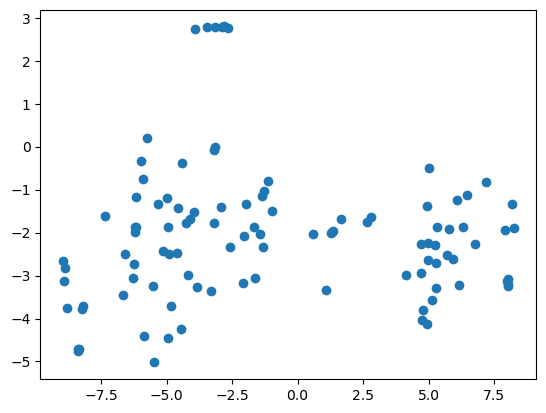

In [35]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#По графику видно, что можно разделить данные, как минимум, на 3 кластера.

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [55]:
# !pip3 install sklearn


  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=d18b3a8ed90fa5216c6ddf5687e6a686f064d7dd0dd579dbd9074a93ca63d9af
  Stored in directory: /Users/elizavetapolkovnikova/Library/Caches/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [57]:
from sklearn.cluster import KMeans
kmeans = Kmeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = Kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

NameError: name 'Kmeans' is not defined